# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import json
from pprint import pprint
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
# pprint(btc_data)
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
# pprint(eth_data)
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = round(my_btc * btc_price, 2)
my_eth_value = round(my_eth * eth_price, 2)

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13630.73
The current value of your 5.3 ETH is $1944.89


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('APCA_API_KEY')
alpaca_secret_key = os.getenv('APCA_API_SECRET')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2020-10-16', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
inv_data_df = alpaca.get_barset(tickers, timeframe, start = today, end = today).df

# Preview DataFrame
inv_data_df.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2020-10-16 00:00:00-04:00  117.99  118.0778  117.88  117.88  3591541  348.96   

                                                            
                             high    low   close    volume  
time                                                        
2020-10-16 00:00:00-04:00  350.75  347.1  347.25  62796942

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(inv_data_df['AGG']['close'])
spy_close_price = float(inv_data_df['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.88
Current SPY closing price: $347.25


In [10]:
# Compute the current value of shares
my_agg_value = round(agg_close_price * my_agg, 2)
my_spy_value = round(spy_close_price * my_spy, 2)

# Print current value of share
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $23576.00
The current value of your 50 SPY shares is $17362.50


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 1200

# Create savings DataFrame
dict_savings = {'crypto' : my_btc_value + my_eth_value, 'shares' : my_agg_value + my_spy_value}

df_savings = pd.DataFrame.from_dict(dict_savings, orient = 'index').rename(columns = {0 : 'amount ($)'})

# Display savings DataFrame
df_savings

,amount ($)
crypto,15575.62
shares,40938.50


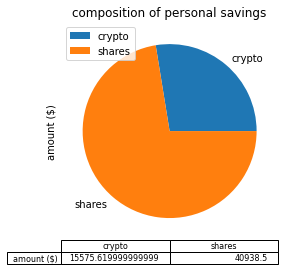

In [12]:
# Plot savings pie chart
savings_pie = df_savings.plot(kind = 'pie', y = 'amount ($)', title = 'composition of personal savings', table = True)

In [13]:
total_savings = df_savings.sum()[0]
total_savings

56514.119999999995

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()[0]

# Validate saving health
if total_savings >= emergency_fund:
    print(f'congratulations! you have enough money in your emergency fund.')
else:
    print(f'you are ${emergency_fund - total_savings} away from reaching your emergency fund goal.')

congratulations! you have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
weights = [.4, .6]
num_sims = 500
years = 30

mc_portfolio = MCSimulation(portfolio_data = df_stock_data, weights = weights, num_simulation = num_sims, num_trading_days = 252 * years)

In [18]:
# Printing the simulation input data
mc_portfolio.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996206,1.000874,1.004027,0.995709,1.014824,0.993160,1.000702,0.996123,0.994810,1.006620,...,0.999042,1.000924,0.992999,1.009812,1.000201,1.023329,0.989599,1.003522,1.008082,1.009534
2,1.010949,1.001418,1.009546,0.990861,1.010550,0.996622,0.998577,0.996980,1.004196,1.004779,...,0.988845,1.009094,0.981221,1.003932,1.008771,1.018594,0.988577,1.008637,1.007803,1.017447
3,1.007453,0.995384,1.021801,0.988830,1.007587,0.979012,1.003545,0.997032,1.010833,1.012340,...,0.995654,1.005540,0.988147,0.998958,1.006907,1.014430,0.985791,1.006997,1.011398,1.023327
4,1.013235,1.001913,1.013124,0.990157,1.011894,0.987187,0.998279,1.006116,1.008089,1.018638,...,0.992715,1.021809,0.987490,0.989521,0.996706,1.007805,0.988567,1.005215,1.013632,1.019056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.991766,0.828490,0.977925,1.096398,1.239756,1.384059,1.268575,1.032497,0.957904,1.060743,...,1.242936,0.956166,1.011667,1.015658,1.287952,1.040601,0.953624,1.020417,0.935179,1.266246
249,0.990216,0.827805,0.986434,1.091189,1.224100,1.389690,1.267180,1.028796,0.961519,1.050087,...,1.236446,0.949886,1.019063,1.015648,1.291987,1.049278,0.952001,1.025024,0.918633,1.271830
250,0.986064,0.836461,0.993910,1.088688,1.232212,1.384348,1.264344,1.037807,0.953535,1.045208,...,1.236784,0.960055,1.025458,1.011399,1.286488,1.048521,0.942054,1.016026,0.919884,1.259530
251,0.994919,0.829794,0.990317,1.083388,1.233857,1.375926,1.281488,1.043339,0.950093,1.036981,...,1.238428,0.957970,1.030233,1.028375,1.293426,1.054108,0.943269,1.012812,0.917796,1.254769


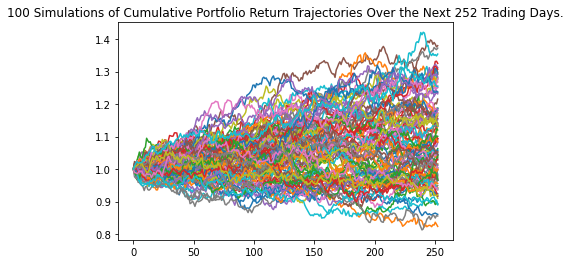

In [20]:
# Plot simulation outcomes
mc_portfolio_plot = mc_portfolio.plot_simulation()

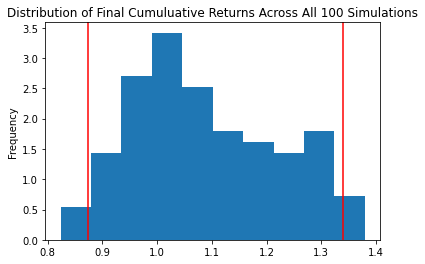

In [21]:
# Plot probability distribution and confidence intervals
mc_portfolio_dist_plot = mc_portfolio.plot_distribution()

### Retirement Analysis

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_portfolio_summary = pd.DataFrame(mc_portfolio.summarize_cumulative_return()).rename(columns = {252 : 'results'})

# Print summary statistics
mc_portfolio_summary

,results
count,100.000000
mean,1.088816
std,0.134251
min,0.823682
25%,0.983110
50%,1.057873
75%,1.182070
max,1.379582
95% CI Lower,0.874625
95% CI Upper,1.340253


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [23]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(mc_portfolio_summary.loc['95% CI Lower', 'results'] * initial_investment, 2)
ci_upper = round(mc_portfolio_summary.loc['95% CI Upper', 'results'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next {years} years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 1 years will end within in the range of $17492.49 and $26805.06


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
adj_initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
adj_ci_lower = round(mc_portfolio_summary.loc['95% CI Lower', 'results'] * adj_initial_investment, 2)
adj_ci_upper = round(mc_portfolio_summary.loc['95% CI Upper', 'results'] * adj_initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${adj_initial_investment} in the portfolio"
      f" over the next {years} years will end within in the range of"
      f" ${adj_ci_lower} and ${adj_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 1 years will end within in the range of $26238.74 and $40207.59
